Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.33e-02       1.11e-16          50             66       
       2          2.77e-04       0.00e+00          116             2       
       3          1.42e-04       0.00e+00          118             1       
       4          1.42e-04       0.00e+00          119             1       
       5          1.42e-04       0.00e+00          120             1       
       6          9.29e-05       0.00e+00          121             0       
Solved in 6 iterations, number of nodes 121. 
Maximum relative residual: 9.29e-05 
Maximum boundary residual: 0.00e+00


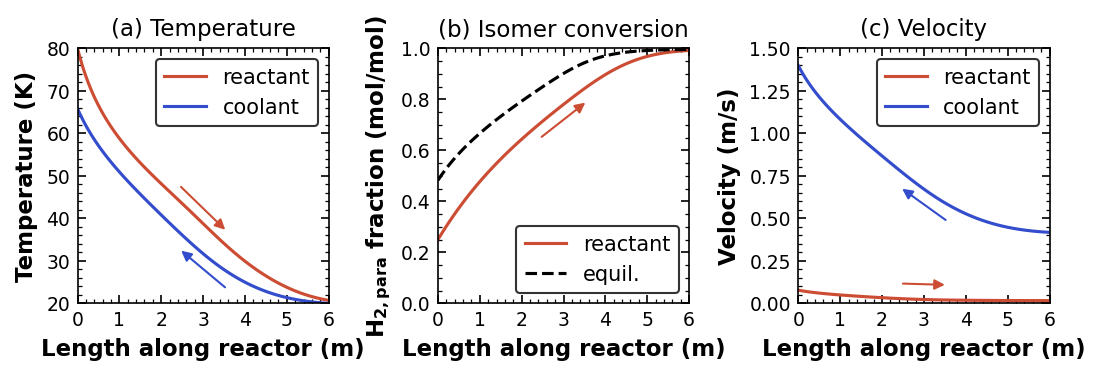

In [5]:
# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': 100.0,   # tonne-per-day
        'x_para': 0.25,            # para-hydrogen fraction at inlet
        'temperature': 80,         # inlet temperature (K)
        'pressure': 5000          # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Helium",         # type of coolant
        'mass_flow_rate': 600.0,   # tonne-per-day
        'temperature':  20.0,      # temperature of coolant at inlet (K)
        'pressure': 500,           # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': 6.0,             # m
        'width': 2.0,              # m
        'height': 2.0,             # m
        'fin_thickness': 0.4e-3,   # m
        'fin_height': 6.0e-3,      # m
        'fin_pitch': 1.5e-3,       # m
        'seration_length': 6.0e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,    # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,     # mean particle diameter
        'density': 4.0            # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,              # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,       # tolerance of bvp solver
        'delta_t': 1.0            # initial guess of temperature difference between streams
    }
}

# import packages
!pip install hydrogen-pfhx
!pip install matplotlib
import matplotlib
from hydrogen_pfhx import model, outputs

# run the model with test config
results = model.model()

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.show()

# add drive file data
from google.colab import drive
drive.mount('/content/drive')

# save results
outputs.save_results(results,'/content/drive/MyDrive/Colab Notebooks/results.csv')